In this notebook, we try to we fetch data from Monrycontrol website for Reliance Industries Ltd. (RIL) stock for a time period of 5 years from Jan 2018 to Jan 2023. And try to analyze it to know the investment opportunity using the suitable probability distribution.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
def fetch_data():
    urls_list = [
             'https://www.moneycontrol.com/stocks/hist_stock_result.php?sc_id=RI&pno=1&hdn=daily&fdt=2018-01-01&todt=2023-01-01&ex=B',
             'https://www.moneycontrol.com/stocks/hist_stock_result.php?sc_id=RI&pno=2&hdn=daily&fdt=2018-01-01&todt=2023-01-01&ex=B',
             'https://www.moneycontrol.com/stocks/hist_stock_result.php?sc_id=RI&pno=3&hdn=daily&fdt=2018-01-01&todt=2023-01-01&ex=B'
    ]
    dfs=[]
    for url in urls_list:
        data = pd.read_html(url, attrs={'class':'tblchart'})
        data = pd.DataFrame(data[0])
        dfs.append(data)
    
    df = pd.concat(dfs)
    df.columns = df.columns.droplevel(0)
    df = df.reset_index()
    df = df.drop(['index'],axis=1)
    return df

In [15]:
df = fetch_data()
df.head()

,Date,Open,High,Low,Close,Volume,(High-Low),(Open-Close)
0,30-12-2022,2547.00,2576.90,2542.55,2548.20,77470,34.35,-1.20
1,29-12-2022,2532.05,2549.00,2526.50,2542.55,157229,22.50,-10.50
2,28-12-2022,2535.90,2549.90,2521.25,2544.45,168925,28.65,-8.55
3,27-12-2022,2529.00,2548.80,2514.35,2545.05,184837,34.45,-16.05
4,26-12-2022,2513.70,2542.05,2493.95,2524.50,95382,48.10,-10.80


Data set Explanation:

It seems that we have retrieved the historical prices of RIL stock from the Moneycontrol website. The data we have includes the date, opening price, high price, low price, closing price, volume, and the spread between the high and low prices as well as the spread between the opening and closing prices.

We want to analyze this data to understand weather investing in this stock will result in large returns. So we use this data to calculate the daily returns of RIL stock by using the formula:

Return = (Closing Price - Opening Price) * 100 / Opening Price

In [16]:
df['Return'] = (df['Close']-df['Open'])/df['Open']

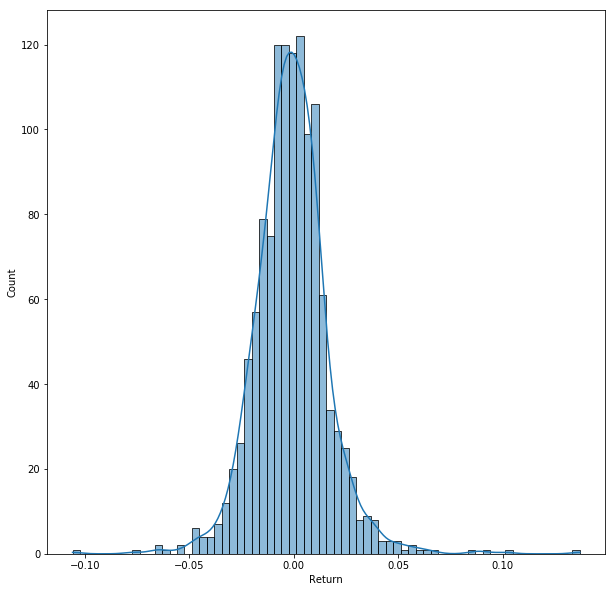

In [21]:
# Extract the closing price data
closing_prices = df['Return']

# Plot the histogram of closing price distribution
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(closing_prices, kde=True)
plt.savefig('distribution.png')

In [20]:
# Calculate the daily returns
df['daily_returns'] = df['Close'].pct_change()

# Calculate the mean daily return
mean_return = df['daily_returns'].mean()

# Print the mean daily return as a percentage
print("Mean daily return: {:.2%}".format(mean_return))


Mean daily return: -0.06%


*Conclusion:*

Based on the analysis of the daily returns of RIL stock over a period of five years, it can be concluded that the returns follow a normal distribution. 

Furthermore, the daily returns for RIL stock show a slight negative trend over the five-year period, with a daily return of -0.06% on average. This suggests that there may be some downward pressure on the stock in the short term, and investors should consider this when making investment decisions.

It is important to note that past performance is not necessarily indicative of future results, and that other factors such as company financials, industry trends, and global economic conditions should also be taken into account when making investment decisions.